# Ensembler

In [1]:
import os, sys
path = os.getcwd()+"/.."
sys.path.append(path)    #give here the path to the folder containing the package,default does not work!!
print(os.getcwd())

c:\Users\benja\OneDrive - ETHZ\PhD\Code\Ensembler_native_github\examples


## Import

In [3]:
import ensembler


## Basic Definitions

In [5]:
#Potential:
potential = ensembler.potentials.OneD.harmonicOsc()
#Integrator
integrator = ensembler.integrator.positionVerletIntegrator() #metropolisMonteCarloIntegrator()
#System
system = ensembler.system.system(integrator=integrator, potential=potential)

#exchange dimension:
exchange_dimension = {"temperature": range(298, 350, 20)}

## Build Ensbemle

In [6]:
ensemble = ensembler.ensemble.replica_exchange.TemperatureReplicaExchange(system=system)


BUILD Replicas
Coordinates
	 [coordinates(temperature=298), coordinates(temperature=308), coordinates(temperature=318)] 

Replicas:
	uniqID	coordinates
	0	coordinates(temperature=298)
	1	coordinates(temperature=308)
	2	coordinates(temperature=318)


In [7]:
ensemble

In [8]:
ensemble.replicas

{0: <ensembler.system.basic_system.system at 0x2ac2d7e7048>,
 1: <ensembler.system.basic_system.system at 0x2ac2d7e72c8>,
 2: <ensembler.system.basic_system.system at 0x2ac2d7e7808>}

# Simulate

In [9]:
ensemble.simulate(25, reset_ensemble=True)

c:\Users\benja\OneDrive - ETHZ\PhD\Code\Ensembler_native_github\examples/..\ensembler\ensemble\replica_exchange.py:88: RuntimeWarning: divide by zero encountered in true_divide
  i, replica in enumerate(self.replicas)]
c:\Users\benja\OneDrive - ETHZ\PhD\Code\Ensembler_native_github\examples/..\ensembler\ensemble\replica_exchange.py:88: RuntimeWarning: invalid value encountered in true_divide
  i, replica in enumerate(self.replicas)]
c:\Users\benja\OneDrive - ETHZ\PhD\Code\Ensembler_native_github\examples/..\ensembler\ensemble\_replica_graph.py:119: RuntimeWarning: overflow encountered in exp
  _defaultRandomness = lambda self, originalParams, swappedParams: ((1 / self.randomnessIncreaseFactor) * np.random.rand() <= np.exp(-1.0 / (const.gas_constant / 1000.0 * self._temperature_exchange) * (originalParams - swappedParams+0.0000001))) #pseudo count, if params are equal


In [10]:
ensemble.exchange_information

,nExchange,uniqueReplicaID,replicaI,exchangeCoordinateI,TotEI,replicaJ,exchangeCoordinateJ,TotEJ,doExchange
0,1,1,0,0,[549.6560644565578],1,1,[1762.2795401801309],[True]
1,1,0,1,1,[17.89407612579252],0,0,[inf],[True]
2,1,2,2,2,[987.2009438285688],2,2,[987.2009438285688],False
3,2,1,0,0,[5.357079122546692],0,0,[5.357079122546692],False
4,2,2,1,1,[1868.684515594467],2,2,[997.8104033112194],[True]
...,...,...,...,...,...,...,...,...,...
70,24,1,1,1,[1885.7268245746477],2,2,[995.0029431422108],[True]
71,24,2,2,2,[255.85601285245633],1,1,[7489.412014672174],[True]
72,25,1,0,0,[562.3635651713895],1,1,[1867.526448419164],[True]
73,25,0,1,1,[17.840809405307816],0,0,[inf],[True]


# Visualisation

In [12]:

import matplotlib.pyplot as plt
%matplotlib inline

params ={"figure.facecolor": "w",
         "font.size": 14}
plt.rcParams.update(params)
import numpy as np


In [13]:
transition_dataFrame = ensemble.exchange_information
def generate_replica_traces(transition_dataFrame):
    transition_range = 0.25

    traces = {}
    max_x = 0
    max_y = 0
    for replica in sorted(set(transition_dataFrame.uniqueReplicaID)):
        tmp_frame = transition_dataFrame.loc[transition_dataFrame.uniqueReplicaID == replica].sort_values("nExchange")
        #print(tmp_frame)
        #trace = tmp_frame[["nExchange", "replicaI"]]
        x = list(tmp_frame.nExchange)
        y = list(tmp_frame.replicaI.apply(lambda x: list(ensemble.exchange_dimensions["temperature"])[x]))
        reversed_order_y = list(map(lambda x: -1 * x, y))  # block_order replicas inverse for nicer visualisation

        max_x = max(x) if(max(x)>max_x)else max_x
        max_y = max(y) if (max(y) > max_y) else max_y

        #  transition_trace
        trace = ([0, 1 - transition_range], [-1 * replica, -1 * replica])  # give initial_pos
        for ind, trial in enumerate(x):
            trace[0].append(trial - transition_range)
            trace[0].append(trial + transition_range)
            trace[1].append(trace[1][len(trace[1]) - 1])
            trace[1].append(reversed_order_y[ind])
        traces.update({replica: trace})
    return traces
traces = generate_replica_traces(transition_dataFrame=transition_dataFrame)

C:\Users\benja\Anaconda3\envs\EnsemblerN\lib\site-packages\ipykernel_launcher.py:72: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


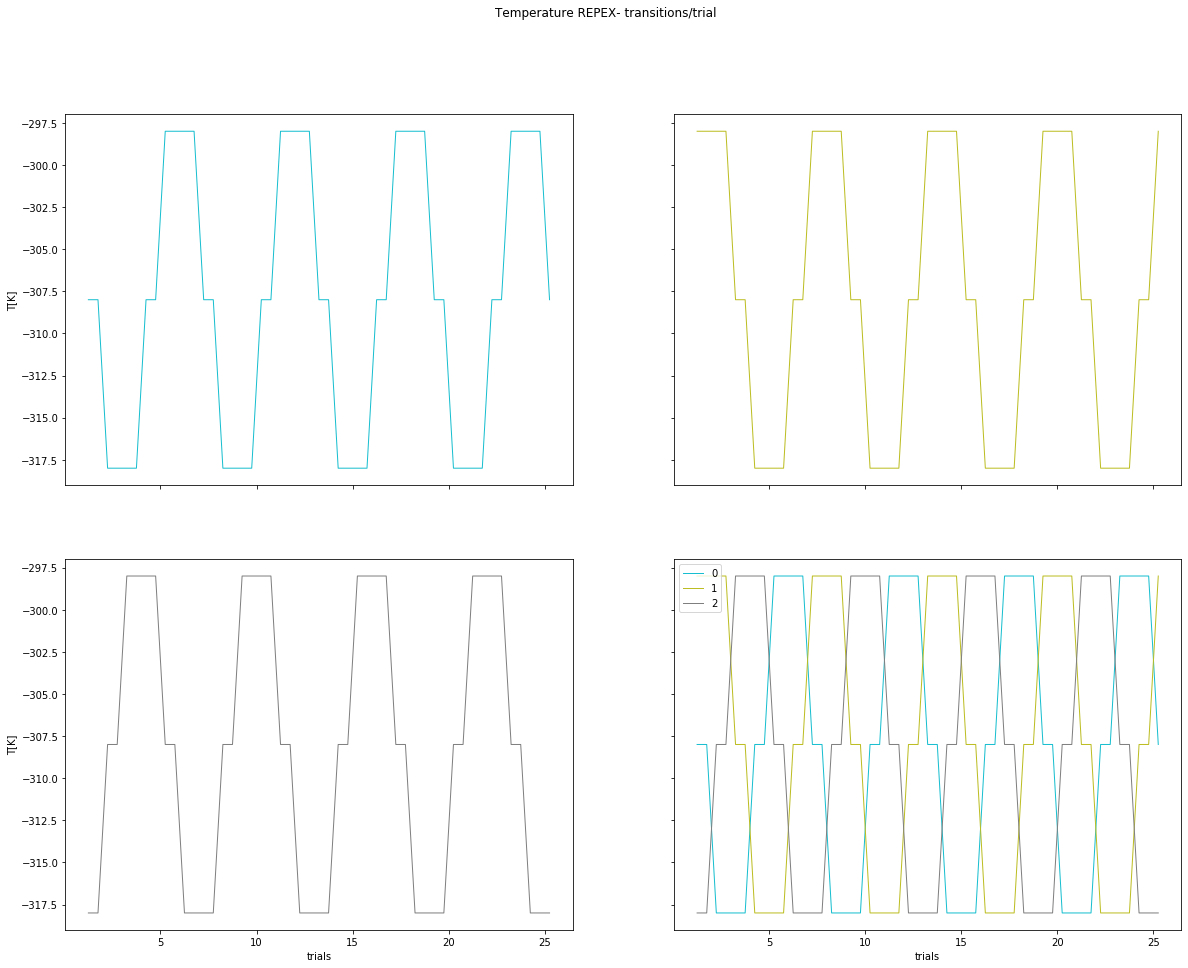

In [14]:

# todo: make visualisation function here 

out_path:str=None
title_prefix:str="test"
s_values=None
cut_1_replicas=False
xBond:tuple=None
equilibration_border:int=None
transparency=1
color_gradient_flag=True
show_repl_leg=False


#plotting
import matplotlib
matplotlib.use('Agg')
matplotlib.rcParams['agg.path.chunksize'] = 10000   #avoid chunksize error
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from matplotlib.cm import get_cmap

%matplotlib inline

num_replicas = traces.keys()

trace_color_dict = list(reversed(cm.get_cmap("tab10").colors))
repnum = len(traces)

if (cut_1_replicas and s_values):
    count_1 = s_values.count(1.0)  # filter 1 replicas@!
    yBond = (count_1-1, len(s_values))
    s_values = s_values[count_1-1:] if(count_1 != 0) else s_values

else:
    yBond = None

# general_Settings:
# init
ammount_of_x_labels = 5
ammount_of_y_labels = 21

starting_step = 3

# replica_trace options:
transition_range = 0.15
trace_width = 1

replica_traces = []
# prepare transition dict
traces, max_exch, max_y = traces, 10,20#max_x, max_y

#DO PLOTTING
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=[20,15])
axes = axes.flat

for replica in num_replicas:
    trace = traces[replica]
    label = str(replica)
    replica_traces.append(axes[replica].plot(trace[0][starting_step:], trace[1][starting_step:], label=label, lw=trace_width, alpha=transparency, color=trace_color_dict[replica % repnum]))
    replica_traces.append(axes[len(num_replicas)].plot(trace[0][starting_step:], trace[1][starting_step:], label=label, lw=trace_width, alpha=transparency, color=trace_color_dict[replica % repnum]))
    
    if(replica == 0 or replica == 2):
        axes[replica].set_ylabel("T[K]")
    if(replica > 1):
        axes[replica].set_xlabel("trials")

axes[len(num_replicas)].set_xlabel("trials")

fig.suptitle("Temperature REPEX- transitions/trial")
plt.legend()
fig.show()


In [15]:
transition_dataFrame

,nExchange,uniqueReplicaID,replicaI,exchangeCoordinateI,TotEI,replicaJ,exchangeCoordinateJ,TotEJ,doExchange
0,1,1,0,0,[549.6560644565578],1,1,[1762.2795401801309],[True]
1,1,0,1,1,[17.89407612579252],0,0,[inf],[True]
2,1,2,2,2,[987.2009438285688],2,2,[987.2009438285688],False
3,2,1,0,0,[5.357079122546692],0,0,[5.357079122546692],False
4,2,2,1,1,[1868.684515594467],2,2,[997.8104033112194],[True]
...,...,...,...,...,...,...,...,...,...
70,24,1,1,1,[1885.7268245746477],2,2,[995.0029431422108],[True]
71,24,2,2,2,[255.85601285245633],1,1,[7489.412014672174],[True]
72,25,1,0,0,[562.3635651713895],1,1,[1867.526448419164],[True]
73,25,0,1,1,[17.840809405307816],0,0,[inf],[True]
